# Time Series Forecasting - Graded assessment (40 Marks)

### DATA_SET:

In [126]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   pylab                              import  rcParams
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.arima.model import  ARIMA
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.graphics.tsaplots import  plot_acf,plot_pacf
import itertools
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from pandas.tseries.offsets import BDay
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline



A time series dataset depicting the total number of female births recording in California, USA during the year of 1959.
This dataset has only the date ("dd/mm/yyyy" format), and the number of births. There are 365 records in total.

* date ==			date field
* births == 	    total number of female births recording in California (numeric)

#### Kindly change the below cells from markdown to code and execute it

In [7]:
import pandas as pd


df=pd.read_csv("data_set.csv")

df.head()

,date,births
0,01-01-1959,35
1,02-01-1959,32
2,03-01-1959,30
3,04-01-1959,31
4,05-01-1959,44


In [8]:
df.tail

<bound method NDFrame.tail of            date  births
0    01-01-1959      35
1    02-01-1959      32
2    03-01-1959      30
3    04-01-1959      31
4    05-01-1959      44
..          ...     ...
360  27-12-1959      37
361  28-12-1959      52
362  29-12-1959      48
363  30-12-1959      55
364  31-12-1959      50

[365 rows x 2 columns]>

#### 1.	Data preparation (5 marks)


a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables? (1 MARK)

b. convert the data into time series (2 MARK)


c. Check for defects in the data such as missing values, null, etc. (1 MARK)

d. Visualize the time series using relevant plots. (1 MARK)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [12]:

date=pd.date_range(start='01-01-1959',end='31-12-1959',freq=BDay())
date[0:365]

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-05', '1959-01-06',
               '1959-01-07', '1959-01-08', '1959-01-09', '1959-01-12',
               '1959-01-13', '1959-01-14',
               ...
               '1959-12-18', '1959-12-21', '1959-12-22', '1959-12-23',
               '1959-12-24', '1959-12-25', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [22]:
df['TimeStamp']=pd.to_datetime(df['date'],format='%d-%m-%Y')
df=df.set_index('TimeStamp')
df=df.drop('date',axis=1)
df

,births
TimeStamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [23]:
df.isnull().sum()

births    0
dtype: int64

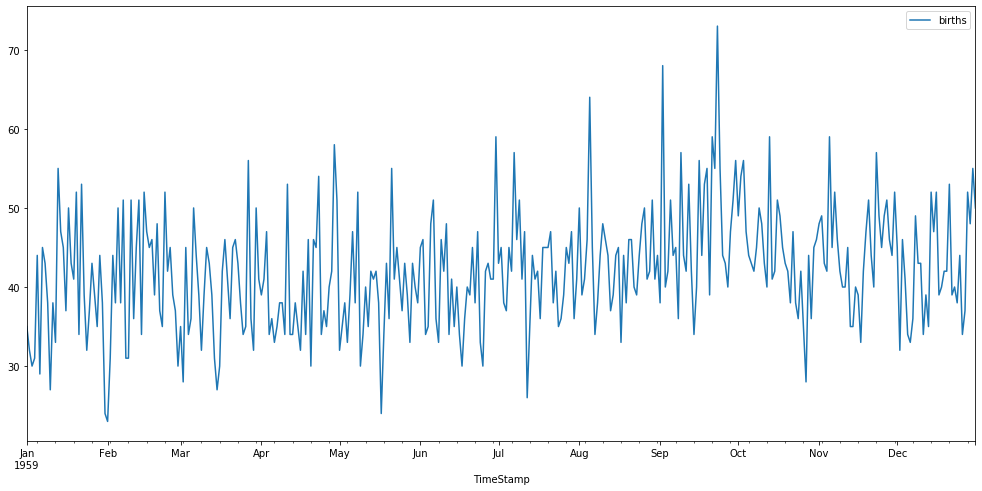

In [25]:
rcParams['figure.figsize']=17,8
df.plot()

#### 2.	Data understanding (15 marks)

a.	Decompose the time series and check for time series components. (4 marks)

b.	Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary?(3+1 marks)

c.	Plot AutoCorrelation and Partial AutoCorrelation function? What is your inference from these plots? (2+2 marks)

d.	Split dataset into train and test sets. Use last one month data for testing. (3 marks)


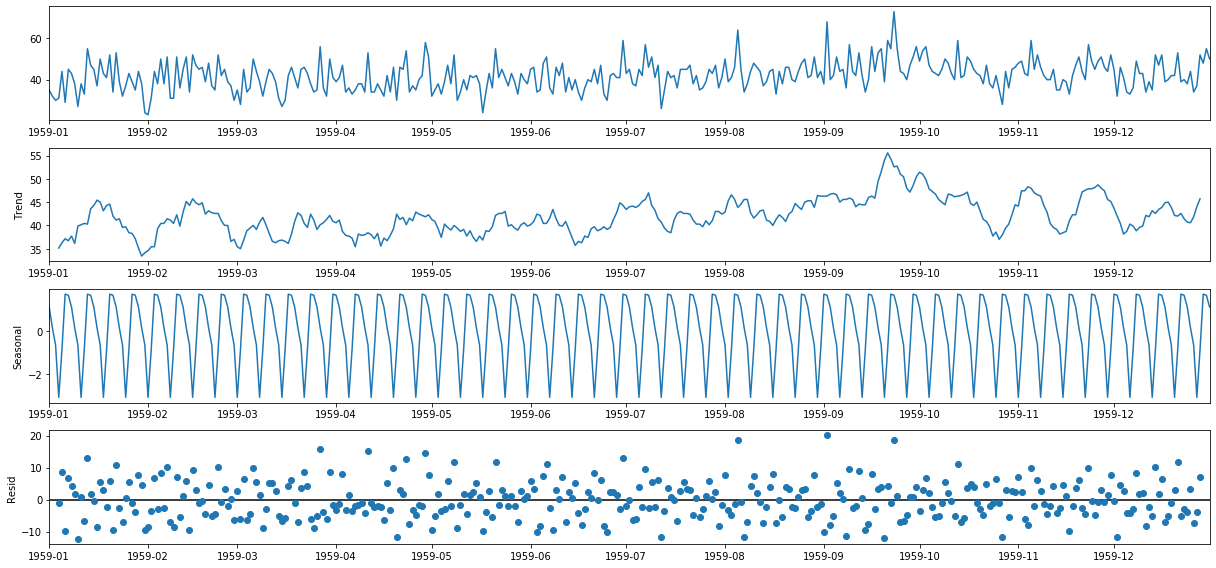

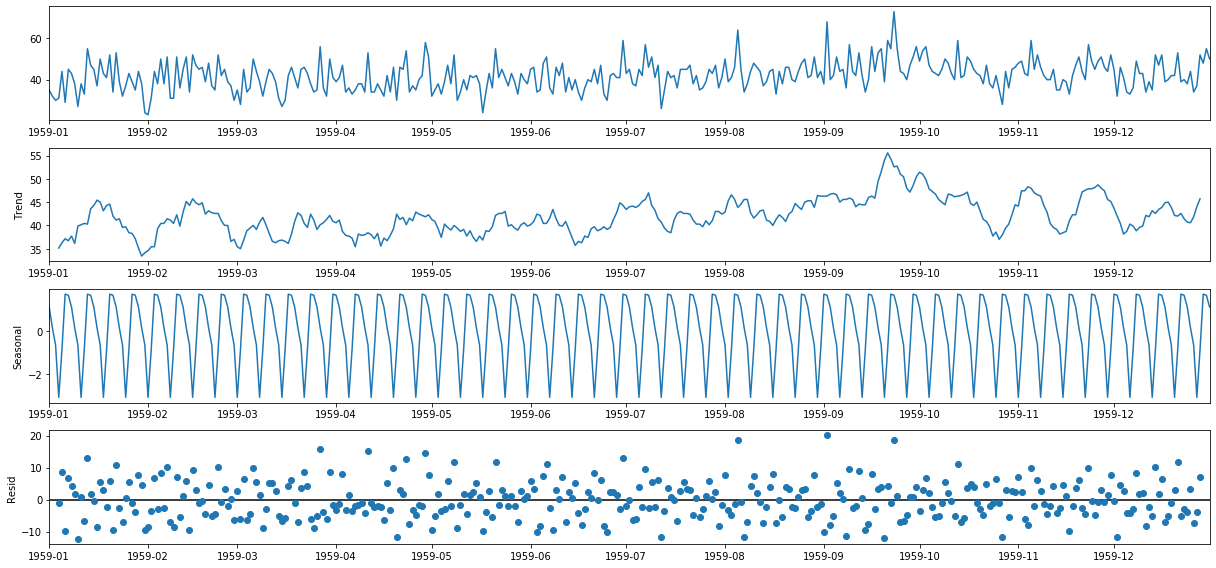

In [29]:
decomposition=seasonal_decompose(df,model='additive')
decomposition.plot()

In [30]:
oberser=df.values
testresult=adfuller(oberser)
testresult

(-4.808291253559766,
 5.243412990149813e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [33]:
#time series is non-stationary
df_difference=df.diff(periods=1).dropna()
observations=df_difference.values
test_result=adfuller(observations)
test_result

(-12.625178633871363,
 1.5472400091968453e-23,
 6,
 357,
 {'1%': -3.44880082033912,
  '5%': -2.869670179576637,
  '10%': -2.5711012838861036},
 2355.0565353964653)

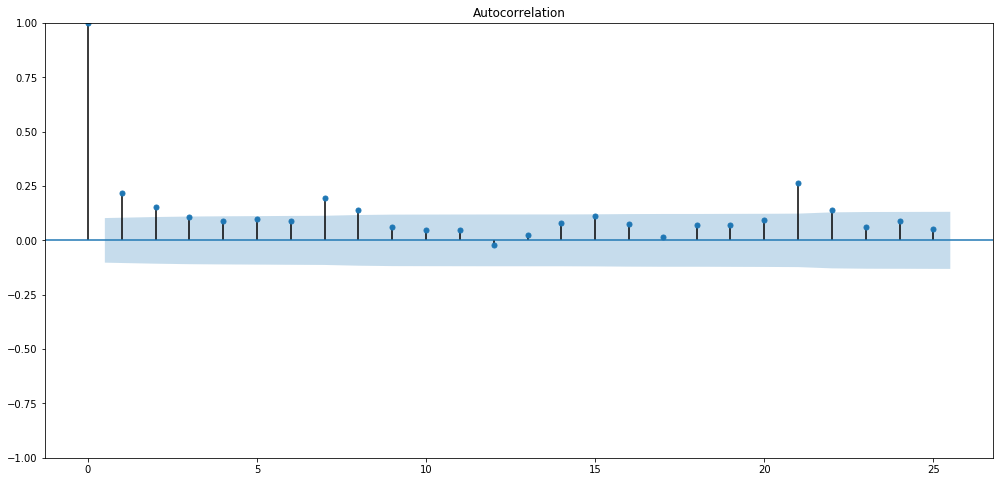

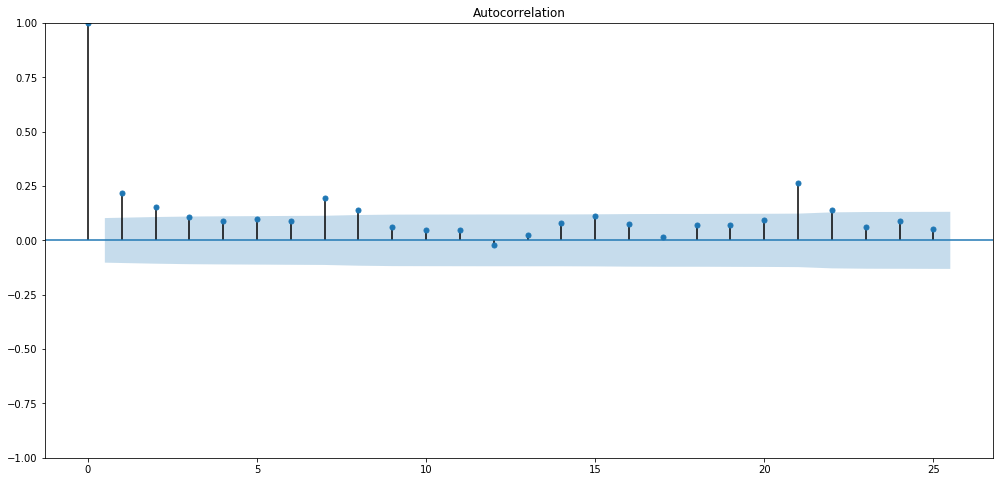

In [37]:
plot_acf(df,lags=25)

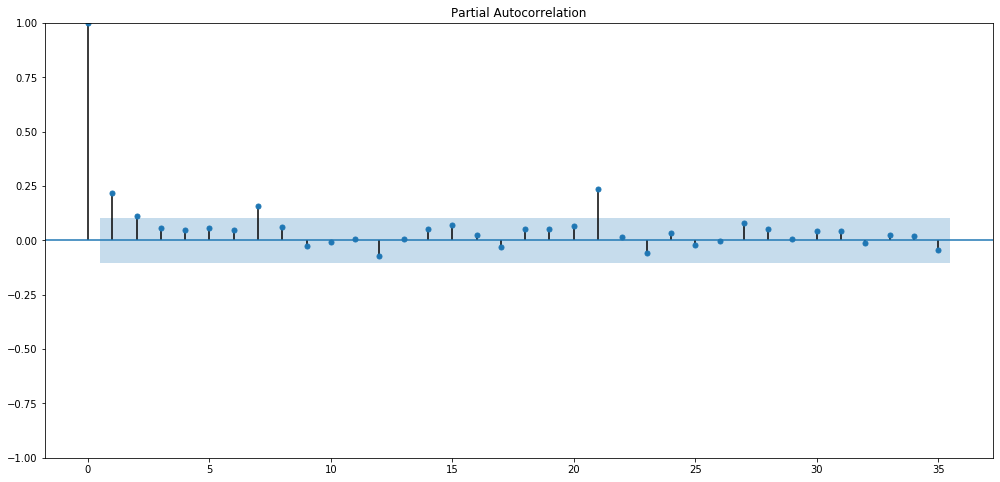

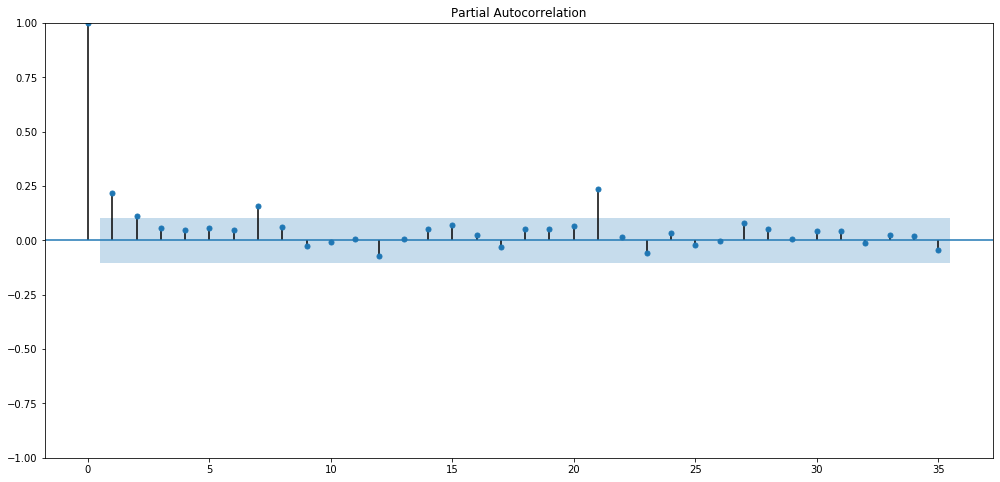

In [39]:
plot_pacf(df,lags=35)

In [53]:
train_last=datetime(1959,12,31)
test_last=datetime(1959,12,31)
train=df[:train_last]
test=df[test_last:]

In [54]:
train.shape

(365, 1)

In [55]:
test.shape

(1, 1)

### 3.	Model Building (20 marks)

a.	Fit a base model and observe the residuals, RMSE and MAPE values of the model. Please comment on whether it is good or not.  (5 marks)

c.	How would you improve the model? What changes you will make in the base model. Fit the final model.   (10 marks)

d.	Analyze the residuals of final model. Feel free to use charts or graphs to explain. (2 marks)

e.	Forecast the  births for next 1 months using the final model? (3 marks)


In [80]:
p=q=range(0,4)
d=range(0,2)
pdq=list(itertools.product(p,d,q))
print('product combination')
for i in range(1,len(pdq)):
      print('model:{}'.format(pdq[i]))
 

product combination
model:(0, 0, 1)
model:(0, 0, 2)
model:(0, 0, 3)
model:(0, 1, 0)
model:(0, 1, 1)
model:(0, 1, 2)
model:(0, 1, 3)
model:(1, 0, 0)
model:(1, 0, 1)
model:(1, 0, 2)
model:(1, 0, 3)
model:(1, 1, 0)
model:(1, 1, 1)
model:(1, 1, 2)
model:(1, 1, 3)
model:(2, 0, 0)
model:(2, 0, 1)
model:(2, 0, 2)
model:(2, 0, 3)
model:(2, 1, 0)
model:(2, 1, 1)
model:(2, 1, 2)
model:(2, 1, 3)
model:(3, 0, 0)
model:(3, 0, 1)
model:(3, 0, 2)
model:(3, 0, 3)
model:(3, 1, 0)
model:(3, 1, 1)
model:(3, 1, 2)
model:(3, 1, 3)


In [97]:
dfob1=pd.DataFrame(columns=['param','AIC'])
dfob1

,param,AIC


In [108]:
for param in pdq:
        try:
           model=ARIMA(train,order=param)
           results_arima=model.fit()
            dfob1=dfob1.append({'param':param,'AIC':results_arima,aic},ignore_index=true)
            
         except:
            continue

IndentationError: unexpected indent (<ipython-input-108-6cacb846abaf>, line 5)

In [109]:
dfob1.sort_values(by=['AIC'])

,param,AIC


In [111]:
model=sm.tsa.arima.ARIMA(train,order=(2,1,3))
results_arima=model.fit()
print(results_arima.summary())

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 births   No. Observations:                  365
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1224.088
Date:                Sun, 29 Sep 2024   AIC                           2460.176
Time:                        06:26:59   BIC                           2483.558
Sample:                    01-01-1959   HQIC                          2469.469
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4968      0.442     -1.123      0.261      -1.364       0.370
ar.L2          0.4563      0.422      1.082      0.279      -0.370       1.283
ma.L1         -0.3247      0.519     -0.626      0.5

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [113]:
ARIMA_prediction=results_arima.forecast(len(test))
ARIMA_prediction

1960-01-01    44.696963
Freq: D, dtype: float64

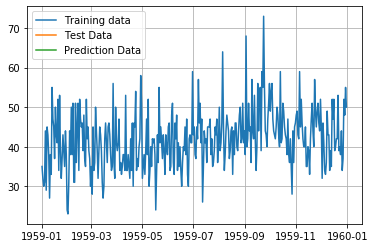

In [116]:
plt.plot(train,label='Training data')
plt.plot(test,label='Test Data')
plt.plot(test.index,ARIMA_prediction,label='Prediction Data')
plt.legend(loc='best')
plt.grid()
plt.show()

In [118]:
rmse=mean_squared_error(test['births'],ARIMA_prediction,squared=False)
print(rmse)

5.303036960436216


In [121]:
def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true)*100)
mape=MAPE(test['births'].values,ARIMA_prediction[0])
print(mape)

10.606073920872433


In [ ]:
# This model MAPE is above 10%,No need of improvement required


In [123]:
residuals=test['births'].values
print(residuals)

[50]


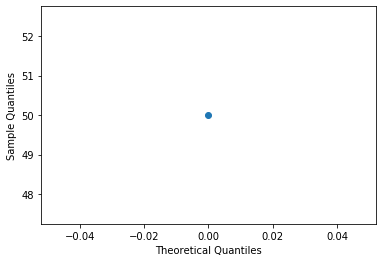

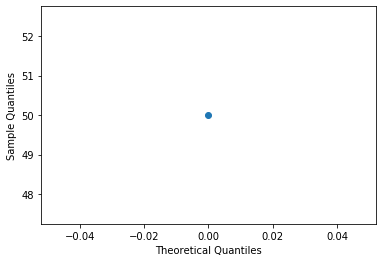

In [129]:
qqplot(residuals,line="s")

In [131]:
forecast=results_arima.forecast(30)

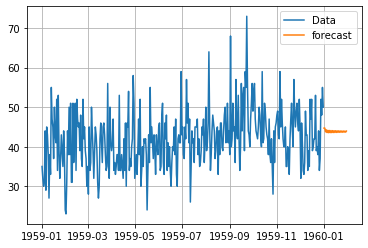

In [132]:
plt.plot(df,label='Data')
plt.plot(forecast,label='forecast')
plt.legend(loc='best')
plt.grid()